# Instacart 1 - by Alex Dance

Criteria of assessment
1.	Insights Presentation
    a.	Structure of presentation
    b.	Variety of insights determined from the data
    c.	A determination of an item most likely added to a customer’s next order
    d.	Technical principles articulated appropriately
2.	Time Management
    a.	Structured approach to the process
    b.	Breakdown of high level coverage in how the time was spent working on the scope
    c.	This should demonstrate your methodology of approaching a request

https://www.kaggle.com/c/instacart-market-basket-analysis/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Import Data

In [2]:
aisles = pd.read_csv('C:/Users/alexd/Alex Folder 1/Instacart/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
aisles['aisle_id'].nunique()

134

In [4]:
departments = pd.read_csv('C:/Users/alexd/Alex Folder 1/Instacart/departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
departments['department_id'].nunique()

21

In [6]:
# Not needed
sample = pd.read_csv('C:/Users/alexd/Alex Folder 1/Instacart/sample_submission.csv')
sample.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [7]:
products = pd.read_csv('C:/Users/alexd/Alex Folder 1/Instacart/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
products.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [9]:
orders = pd.read_csv('C:/Users/alexd/Alex Folder 1/Instacart/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
orders.sample(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2515596,453644,151426,prior,10,6,11,3.0
701062,3314755,42232,prior,20,1,12,7.0
1267460,3132324,76223,prior,13,3,14,28.0
612657,2944466,36944,prior,13,2,16,11.0
3144361,2867172,189589,prior,7,3,15,5.0
1909044,1454134,114629,prior,3,3,20,11.0
1907040,1373311,114494,prior,22,5,16,5.0
170456,2217376,10292,prior,44,2,20,0.0
2826835,2692578,170550,prior,3,5,16,30.0
633651,2036808,38171,prior,16,5,9,1.0


In [11]:
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [12]:
order_products_train = pd.read_csv('C:/Users/alexd/Alex Folder 1/Instacart/order_products__train.csv')
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
order_products_train.nunique()

order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64

In [14]:
order_products_train.sample(20)

,order_id,product_id,add_to_cart_order,reordered
561144,1379208,48900,2,0
1223792,3024586,8424,8,1
463738,1136571,45807,9,1
127205,311454,1468,34,1
806504,1988468,47156,2,0
1206161,2979470,48523,2,0
604699,1487120,16965,3,1
1352436,3341480,42768,3,1
870149,2146499,39581,9,1
395518,966298,5652,15,1


In [15]:
order_products_train['add_to_cart_order'].nunique()

80

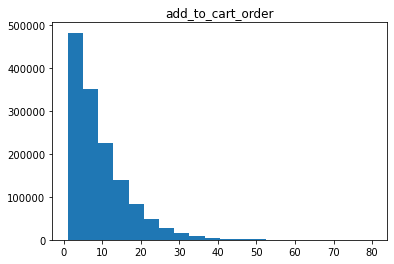

In [16]:
plt.title('add_to_cart_order')
plt.hist(order_products_train['add_to_cart_order'], bins =20)
plt.show()

#To fix

In [17]:
product_sales = order_products_train['product_id'].value_counts()

In [18]:
prod_sales = order_products_train.groupby(["product_id"]).aggregate("count").reset_index()

In [19]:
prod_sales.head()

,product_id,order_id,add_to_cart_order,reordered
0,1,76,76,76
1,2,4,4,4
2,3,6,6,6
3,4,22,22,22
4,5,1,1,1


In [20]:
# Extra

In [21]:
print(product_sales)

24852    18726
13176    15480
21137    10894
21903     9784
47626     8135
         ...  
44256        1
2764         1
4815         1
43736        1
46835        1
Name: product_id, Length: 39123, dtype: int64


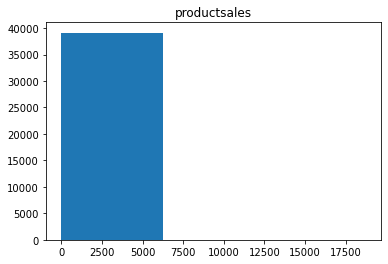

In [22]:
plt.title('productsales')
plt.hist(product_sales, bins =3)
plt.show()

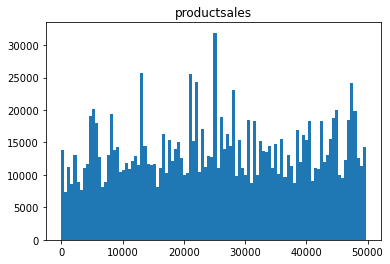

In [23]:
plt.title('productsales')
plt.hist(order_products_train['product_id'], bins =100)
plt.show()

In [24]:
order_products_prior = pd.read_csv('C:/Users/alexd/Alex Folder 1/Instacart/order_products__prior.csv')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [25]:
order_products_prior.nunique()

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64

C:\Users\alexd\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alexd\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


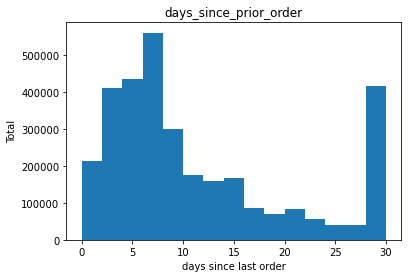

In [26]:
import matplotlib.pyplot as plt
num_bins = 15
plt.title('days_since_prior_order')
plt.xlabel('days since last order')
plt.ylabel('Total')
plt.hist(orders['days_since_prior_order'], bins =num_bins)
plt.show()

In [27]:
import matplotlib.ticker as tkr
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.hist.html
#    https://stackoverflow.com/questions/25973581/how-do-i-format-axis-number-format-to-thousands-with-a-comma-in-matplotlib

import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = orders['days_since_prior_order']
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
line, = ax1.plot(t, s, lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50)
ax2.set_xlabel('time (s)')



In [ ]:
#ax = df.plot()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
# https://www.kaggle.com/philippsp/exploratory-analysis-instacart/report

# Group

In [29]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

In [30]:
grouped.head()

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


In [31]:
grouped2 = grouped.pivot('order_dow', 'order_hour_of_day', 'order_number')

In [32]:
grouped2.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


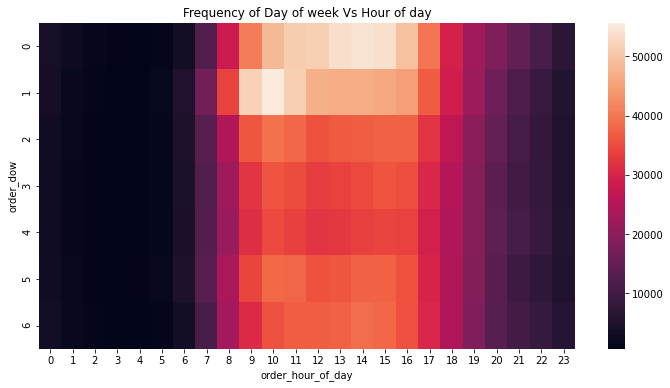

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(grouped2)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [34]:
from pandas.io import sql
import sqlite3

# From https://www.kaggle.com/dimosraptis/instacart-ml-xgboost-last5

In [35]:
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

In [36]:
op = orders.merge(order_products_prior, on='order_id', how='inner')
op.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [37]:
user = op.groupby('user_id')['order_number'].max().to_frame('u_total_orders')
# Reset the index of the DF so to bring user_id from index to column (pre-requisite for step 2.4)
user = user.reset_index()
user.head()

,user_id,u_total_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


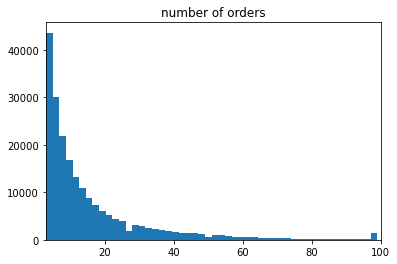

In [38]:
# Extra
import matplotlib.pyplot as plt
num_bins = 5
plt.title('number of orders')
#plt.xlabel('number of orders')
#plt.ylabel('number')
plt.hist(user['u_total_orders'], bins =50)
plt.xlim((3,100))
plt.show()

In [39]:
user['u_total_orders'].unique()

array([10, 14, 12,  5,  4,  3, 20,  7, 13, 22,  6, 40,  9, 33, 15, 18, 81,
       24,  8, 37, 23, 16, 11, 19, 67, 27, 77, 39, 17, 71, 26, 29, 32, 76,
       45, 31, 65, 35, 44, 58, 28, 99, 70, 49, 21, 36, 25, 42, 68, 41, 30,
       51, 38, 34, 63, 53, 86, 52, 54, 59, 82, 93, 50, 64, 94, 56, 95, 78,
       75, 72, 46, 47, 69, 43, 83, 85, 66, 48, 55, 74, 61, 62, 79, 73, 57,
       60, 88, 97, 89, 84, 91, 90, 92, 80, 87, 98, 96], dtype=int64)

In [40]:
tot_sum_orders = user['u_total_orders'].value_counts()
print(tot_sum_orders)

3     23986
4     19590
5     16165
6     13850
7     11700
      ...  
93       57
90       56
96       54
97       50
98       47
Name: u_total_orders, Length: 97, dtype: int64


In [41]:
tot_sum_orders.head()

3    23986
4    19590
5    16165
6    13850
7    11700
Name: u_total_orders, dtype: int64

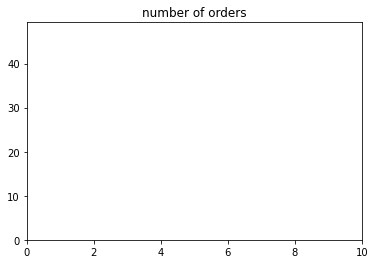

In [42]:
# Extra
#import matplotlib.pyplot as plt
num_bins = 5
plt.title('number of orders')
plt.hist(tot_sum_orders, bins =50)
plt.xlim((0,10))
plt.show()

In [43]:
# this is not right
Grand_total_orders = sum(tot_sum_orders)
print(Grand_total_orders)

206209


In [44]:
tot_sum_orders_cumsum = tot_sum_orders.cumsum() 

In [45]:
tot_sum_orders_cumsum.head()

3    23986
4    43576
5    59741
6    73591
7    85291
Name: u_total_orders, dtype: int64

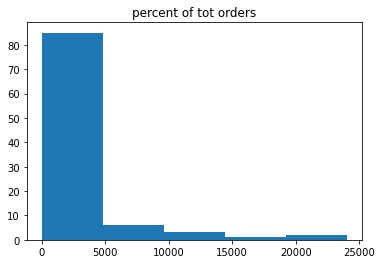

In [46]:
# Extra
import matplotlib.pyplot as plt
num_bins = 5
plt.title('percent of tot orders')
plt.hist(tot_sum_orders , bins =num_bins)
plt.show()

In [47]:
# Back again

In [48]:
u_reorder = op.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio')
u_reorder = u_reorder.reset_index()
u_reorder.head()

,user_id,u_reordered_ratio
0,1,0.694915
1,2,0.476923
2,3,0.625000
3,4,0.055556
4,5,0.378378


In [49]:
# Garbage Collector to free up memory
import gc                         
gc.enable()                       # Activate 

In [50]:
user = user.merge(u_reorder, on='user_id', how='left')

del u_reorder
gc.collect()

user.head()

,user_id,u_total_orders,u_reordered_ratio
0,1,10,0.694915
1,2,14,0.476923
2,3,12,0.625000
3,4,5,0.055556
4,5,4,0.378378


In [51]:
#Number of purchases for each product
# Create distinct groups for each product, count the orders, save the result for each product to a new DataFrame  
prd = op.groupby('product_id')['order_id'].count().to_frame('p_total_purchases')
prd = prd.reset_index()
prd.head()

,product_id,p_total_purchases
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


In [52]:
prd[prd['p_total_purchases'] < 100 ].count()

product_id           29610
p_total_purchases    29610
dtype: int64

In [53]:
prd[prd['p_total_purchases'] < 5 ].count()

product_id           2059
p_total_purchases    2059
dtype: int64

In [54]:
prd[prd['p_total_purchases'] > 0 ].count()

product_id           49677
p_total_purchases    49677
dtype: int64

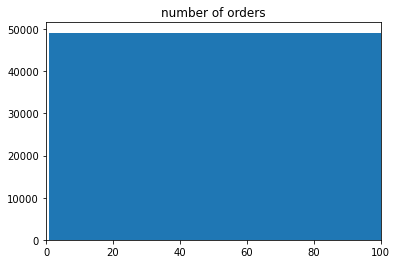

In [55]:
# Extra From alex
#import matplotlib.pyplot as plt
num_bins = 5
plt.title('number of orders')
plt.hist(prd['p_total_purchases'], bins =50)
plt.xlim((0,100))
plt.show()

In [56]:
Temp = prd['p_total_purchases'].value_counts

In [57]:
print(Temp)

<bound method IndexOpsMixin.value_counts of 0        1852
1          90
2         277
3         329
4          15
         ... 
49672       9
49673      49
49674     120
49675      13
49676      89
Name: p_total_purchases, Length: 49677, dtype: int64>


In [58]:
#Remove products with less than 40 purchases
# the x on lambda function is a temporary variable which represents each group
# shape[0] on a DataFrame returns the number of rows
p_reorder = op.groupby('product_id').filter(lambda x: x.shape[0] >40)
p_reorder.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [59]:
#Group products, calculate the mean of reorders
p_reorder = p_reorder.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio')
p_reorder = p_reorder.reset_index()
p_reorder.head()

,product_id,p_reorder_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,8,0.503030


In [60]:
#Merge the prd DataFrame with reorder
prd = prd.merge(p_reorder, on='product_id', how='left')

#delete the reorder DataFrame
del p_reorder
gc.collect()

prd.head()

,product_id,p_total_purchases,p_reorder_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,NaN


In [61]:
prd['p_reorder_ratio'] = prd['p_reorder_ratio'].fillna(value=0)
prd.head()

,product_id,p_total_purchases,p_reorder_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,0.000000


In [62]:
# Create distinct groups for each combination of user and product, count orders, save the result for each user X product to a new DataFrame 
uxp = op.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_total_bought')
# Reset the index of the DF so to bring user_id & product_id rom indices to columns (pre-requisite for step 2.4)
uxp = uxp.reset_index()
uxp.head()

,user_id,product_id,uxp_total_bought
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [63]:
#last 5 orders
op['order_number_back'] = op.groupby('user_id')['order_number'].transform(max) - op.order_number +1 
op5 = op[op.order_number_back <= 5]
last_five = op5.groupby(['user_id','product_id'])[['order_id']].count()
last_five.columns = ['times_last5']
last_five['times_last5_ratio'] = last_five.times_last5 / 5
#last_five = last_five.drop(['times_last5_y','times_last5_ratio_y'])
#############
uxp = uxp.merge(last_five , on=['user_id', 'product_id'], how='left')
del [last_five]
gc.collect()
uxp.head()

,user_id,product_id,uxp_total_bought,times_last5,times_last5_ratio
0,1,196,10,5.0,1.0
1,1,10258,9,5.0,1.0
2,1,10326,1,NaN,NaN
3,1,12427,10,5.0,1.0
4,1,13032,3,2.0,0.4


In [64]:
uxp['times_last5'] = uxp['times_last5'].fillna(value=0)
uxp['times_last5_ratio'] = uxp['times_last5_ratio'].fillna(value=0)
uxp.head()

,user_id,product_id,uxp_total_bought,times_last5,times_last5_ratio
0,1,196,10,5.0,1.0
1,1,10258,9,5.0,1.0
2,1,10326,1,0.0,0.0
3,1,12427,10,5.0,1.0
4,1,13032,3,2.0,0.4


In [65]:
times = op5.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times.head()

Times_Bought_N
user_id product_id                
1       196                      5
        10258                    5
        12427                    5
        13032                    2
        25133                    5

In [66]:
#The total number of orders for each customer ('total_orders')
total_orders = op5.groupby('user_id')['order_number'].max().to_frame('total_orders')
total_orders.head()

,total_orders
user_id,
1,10
2,14
3,12
4,5
5,4


In [67]:
first_order_no = op5.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,1,196,6
1,1,10258,6
2,1,12427,6
3,1,13032,7
4,1,25133,6


In [68]:
span = pd.merge(total_orders, first_order_no, on='user_id', how='right')
span.head()

,user_id,total_orders,product_id,first_order_number
0,1,10,196,6
1,1,10,10258,6
2,1,10,12427,6
3,1,10,13032,7
4,1,10,25133,6


In [69]:
# The +1 includes in the difference the first order were the product has been purchased
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span.head()

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,1,10,196,6,5
1,1,10,10258,6,5
2,1,10,12427,6,5
3,1,10,13032,7,4
4,1,10,25133,6,5


In [70]:
uxp_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D
0,1,196,5,10,6,5
1,1,10258,5,10,6,5
2,1,12427,5,10,6,5
3,1,13032,2,10,7,4
4,1,25133,5,10,6,5


In [71]:
uxp_ratio['uxp_order_ratio'] = uxp_ratio.Times_Bought_N / uxp_ratio.Order_Range_D
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_order_ratio
0,1,196,5,10,6,5,1.0
1,1,10258,5,10,6,5,1.0
2,1,12427,5,10,6,5,1.0
3,1,13032,2,10,7,4,0.5
4,1,25133,5,10,6,5,1.0


In [72]:
uxp_ratio = uxp_ratio.drop(['Times_Bought_N', 'total_orders', 'first_order_number', 'Order_Range_D'], axis=1)
uxp_ratio.head()

,user_id,product_id,uxp_order_ratio
0,1,196,1.0
1,1,10258,1.0
2,1,12427,1.0
3,1,13032,0.5
4,1,25133,1.0


In [73]:
#Remove temporary DataFrames
del [times, first_order_no, span,op5]

In [74]:
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')

del uxp_ratio
uxp.head()

,user_id,product_id,uxp_total_bought,times_last5,times_last5_ratio,uxp_order_ratio
0,1,196,10,5.0,1.0,1.0
1,1,10258,9,5.0,1.0,1.0
2,1,10326,1,0.0,0.0,NaN
3,1,12427,10,5.0,1.0,1.0
4,1,13032,3,2.0,0.4,0.5


In [75]:
#Merge uxp features with the user features
#Store the results on a new DataFrame
data = uxp.merge(user, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,times_last5,times_last5_ratio,uxp_order_ratio,u_total_orders,u_reordered_ratio
0,1,196,10,5.0,1.0,1.0,10,0.694915
1,1,10258,9,5.0,1.0,1.0,10,0.694915
2,1,10326,1,0.0,0.0,NaN,10,0.694915
3,1,12427,10,5.0,1.0,1.0,10,0.694915
4,1,13032,3,2.0,0.4,0.5,10,0.694915


In [76]:
#Merge uxp & user features (the new DataFrame) with prd features
data = data.merge(prd, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,times_last5,times_last5_ratio,uxp_order_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio
0,1,196,10,5.0,1.0,1.0,10,0.694915,35791,0.776480
1,1,10258,9,5.0,1.0,1.0,10,0.694915,1946,0.713772
2,1,10326,1,0.0,0.0,NaN,10,0.694915,5526,0.652009
3,1,12427,10,5.0,1.0,1.0,10,0.694915,6476,0.740735
4,1,13032,3,2.0,0.4,0.5,10,0.694915,3751,0.657158


In [77]:
orders_last = orders[(orders.eval_set=='train') | (orders.eval_set=='test') ]

In [78]:
data = data.merge(orders_last, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,times_last5,times_last5_ratio,uxp_order_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,196,10,5.0,1.0,1.0,10,0.694915,35791,0.776480,1187899,train,11,4,8,14.0
1,1,10258,9,5.0,1.0,1.0,10,0.694915,1946,0.713772,1187899,train,11,4,8,14.0
2,1,10326,1,0.0,0.0,NaN,10,0.694915,5526,0.652009,1187899,train,11,4,8,14.0
3,1,12427,10,5.0,1.0,1.0,10,0.694915,6476,0.740735,1187899,train,11,4,8,14.0
4,1,13032,3,2.0,0.4,0.5,10,0.694915,3751,0.657158,1187899,train,11,4,8,14.0


In [79]:
data_train = data[data.eval_set=='train']

data_train = data_train.merge(order_products_train, on=['product_id', 'order_id'], how='left' )

data_train = data_train.drop(['order_id','eval_set', 'add_to_cart_order'], axis=1)
data_train = data_train.fillna(0)
data_train.head()

,user_id,product_id,uxp_total_bought,times_last5,times_last5_ratio,uxp_order_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,1,196,10,5.0,1.0,1.0,10,0.694915,35791,0.776480,11,4,8,14.0,1.0
1,1,10258,9,5.0,1.0,1.0,10,0.694915,1946,0.713772,11,4,8,14.0,1.0
2,1,10326,1,0.0,0.0,0.0,10,0.694915,5526,0.652009,11,4,8,14.0,0.0
3,1,12427,10,5.0,1.0,1.0,10,0.694915,6476,0.740735,11,4,8,14.0,0.0
4,1,13032,3,2.0,0.4,0.5,10,0.694915,3751,0.657158,11,4,8,14.0,1.0


In [80]:
data_test = data[data.eval_set=='test']
data_test = data_test.drop(['eval_set', 'order_id'], axis=1)
data_test = data_test.fillna(0)
data_test.head()

,user_id,product_id,uxp_total_bought,times_last5,times_last5_ratio,uxp_order_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio,order_number,order_dow,order_hour_of_day,days_since_prior_order
120,3,248,1,0.0,0.0,0.000000,12,0.625,6371,0.400251,13,5,15,11.0
121,3,1005,1,1.0,0.2,0.333333,12,0.625,463,0.440605,13,5,15,11.0
122,3,1819,3,0.0,0.0,0.000000,12,0.625,2424,0.492162,13,5,15,11.0
123,3,7503,1,0.0,0.0,0.000000,12,0.625,12474,0.553551,13,5,15,11.0
124,3,8021,1,0.0,0.0,0.000000,12,0.625,27864,0.591157,13,5,15,11.0


In [84]:
data_test.head(30)

uxp_total_bought  times_last5  times_last5_ratio  \
user_id product_id                                                     
3       248                        1          0.0                0.0   
        1005                       1          1.0                0.2   
        1819                       3          0.0                0.0   
        7503                       1          0.0                0.0   
        8021                       1          0.0                0.0   
        9387                       5          0.0                0.0   
        12845                      1          0.0                0.0   
        14992                      2          0.0                0.0   
        15143                      1          0.0                0.0   
        16797                      3          1.0                0.2   
        16965                      2          0.0                0.0   
        17668                      5          2.0                0.4   
        18370                      1          0.0                0.0   
        18599                      4          3.0                0.6   
        21137                      1          0.0                0.0   
        21903                      8          3.0                0.6   
        22035                      3          1.0                0.2   
        23650                      2          1.0                0.2   
        24010                      2          0.0                0.0   
        24810                      3          1.0                0.2   
        28373                      2          0.0                0.0   
        32402                      3          1.0                0.2   
        38596                      1          0.0                0.0   
        39190                     10          5.0                1.0   
        39922                      1          0.0                0.0   
        40604                      1          0.0                0.0   
        42265                      1          0.0                0.0   
        42557                      1          1.0                0.2   
        43961                      4          3.0                0.6   
        44683                      2          0.0                0.0   

                    uxp_order_ratio  u_total_orders  u_reordered_ratio  \
user_id product_id                                                       
3       248                0.000000              12              0.625   
        1005               0.333333              12              0.625   
        1819               0.000000              12              0.625   
        7503               0.000000              12              0.625   
        8021               0.000000              12              0.625   
        9387               0.000000              12              0.625   
        12845              0.000000              12              0.625   
        14992              0.000000              12              0.625   
        15143              0.000000              12              0.625   
        16797              0.250000              12              0.625   
        16965              0.000000              12              0.625   
        17668              0.666667              12              0.625   
        18370              0.000000              12              0.625   
        18599              0.600000              12              0.625   
        21137              0.000000              12              0.625   
        21903              0.600000              12              0.625   
        22035              0.200000              12              0.625   
        23650              1.000000              12              0.625   
        24010              0.000000              12              0.625   
        24810              1.000000              12              0.625   
        28373              0.000000              12              0.625   
        32402

In [85]:
data_test.shape


(4833292, 12)

In [91]:
y_val.head()

user_id  product_id
133414   5428          1.0
107612   49099         0.0
69469    8021          0.0
190574   6377          1.0
196693   17758         0.0
Name: reordered, dtype: float64

In [88]:
y_train.head(20)

user_id  product_id
107788   28985         0.0
127201   28597         0.0
189426   41195         0.0
127352   42702         1.0
192035   44278         0.0
148360   13032         0.0
126547   27363         0.0
24998    30908         1.0
181146   14647         0.0
22155    16797         0.0
175472   8021          0.0
141497   7114          0.0
127385   17206         0.0
86977    36162         0.0
150526   16744         0.0
203949   36775         0.0
98256    43920         0.0
89150    17053         1.0
66878    8968          0.0
78644    27729         0.0
Name: reordered, dtype: float64

In [89]:
y_train.shape

(6779728,)

In [81]:
data_train = data_train.set_index(['user_id', 'product_id'])
data_test = data_test.set_index(['user_id', 'product_id'])

[0]	train-logloss:0.62514
[10]	train-logloss:0.33599
[20]	train-logloss:0.27017
[30]	train-logloss:0.25322
[40]	train-logloss:0.24888
[50]	train-logloss:0.24773
[60]	train-logloss:0.24719
[70]	train-logloss:0.24687
[79]	train-logloss:0.24670


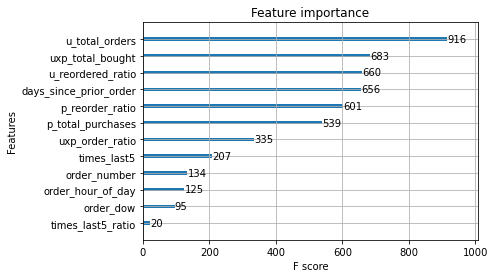

In [82]:
import xgboost
from sklearn.model_selection import train_test_split
data_train.loc[:, 'reordered'] = data_train.reordered.fillna(0)


# subsample
X_train, X_val, y_train, y_val = train_test_split(data_train.drop('reordered', axis=1), data_train.reordered,
                                                    test_size=0.2, random_state=42)


d_train = xgboost.DMatrix(X_train, y_train)
xgb_params = {
    "objective"         : "binary:logistic" #"reg:logistic" # other option binary:logistic  # from https://stackoverflow.com/questions/53530189/the-loss-function-and-evaluation-metric-of-xgboost
    ,"eval_metric"      : "logloss"
    ,"eta"              : 0.1
    ,"max_depth"        : 6
    ,"min_child_weight" :10
    ,"gamma"            :0.70
    ,"subsample"        :0.76
    ,"colsample_bytree" :0.95
    ,"alpha"            :2e-05
    ,"lambda"           :10
    , "tree_method"     : "exact" # added
}

watchlist= [(d_train, "train")]
bst = xgboost.train(params=xgb_params, dtrain=d_train, num_boost_round=80, evals=watchlist, verbose_eval=10)
xgboost.plot_importance(bst)

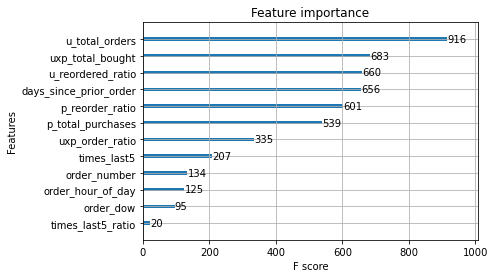

In [83]:
xgboost.plot_importance(bst)

# Plotting 

In [ ]:
from xgboost import plot_tree

#https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/

In [ ]:
#import matplotlib.pyplot as plt

In [ ]:
#!pip install python-graphviz

In [ ]:
#import graphiz

In [ ]:
#plot_tree(bst, num_trees=0, rankdir='LR')

In [ ]:
#xgboost.plot_tree(bst, num_trees=2)

# Continuing

In [92]:
d_test = xgboost.DMatrix(data_test)

data_test = data_test.reset_index()
data_test = data_test[['product_id', 'user_id']]

data_test["reordered"] = (bst.predict(d_test) > 0.21).astype(int)

In [93]:
alex_predict = bst.predict(d_test) 

In [94]:
data_train['reordered']

user_id  product_id
1        196           1.0
         10258         1.0
         10326         0.0
         12427         0.0
         13032         1.0
                      ... 
206209   43961         0.0
         44325         0.0
         48370         0.0
         48697         0.0
         48742         0.0
Name: reordered, Length: 8474661, dtype: float64

In [95]:
alex_predict.shape

(4833292,)

In [104]:
print(alex_predict)

[0.03065652 0.06909523 0.07173465 ... 0.01262679 0.00649037 0.01206609]


In [96]:
print(alex_predict)

[0.03065652 0.06909523 0.07173465 ... 0.01262679 0.00649037 0.01206609]


In [97]:
print(data_test)

         product_id  user_id  reordered
0               248        3          0
1              1005        3          0
2              1819        3          0
3              7503        3          0
4              8021        3          0
...             ...      ...        ...
4833287       48364   206208          0
4833288       48865   206208          0
4833289       49247   206208          0
4833290       49385   206208          0
4833291       49621   206208          0

[4833292 rows x 3 columns]


In [98]:
alex_predict.shape

(4833292,)

In [99]:
data_test.shape

(4833292, 3)

In [100]:
# zzz
from sklearn import svm, metrics

In [101]:
#fpr, tpr, thresholds  = metrics.roc_curve(data_test, alex_predict)

In [ ]:
orders_test = orders[orders.eval_set=='test']

In [ ]:
data_test = data_test.merge(orders_test[["user_id", "order_id"]], on='user_id', how='left')
data_test.head()

In [ ]:
data_test['product_id'] = data_test.product_id.astype(int)
data_test = data_test.drop('user_id', axis=1)


In [ ]:
d = dict()
for row in data_test.itertuples():
    if row.reordered == 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in data_test.order_id:
    if order not in d:
        d[order] = 'None'

# Metrics

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
d_test.type

In [ ]:
data_train.shape

In [ ]:
data_test.shape

In [ ]:
orders_test.shape

In [ ]:
data_test.shape

In [ ]:
#accuracy = accuracy_score(y_test, predictions)
#accuracy = accuracy_score(data_test,d_test)

In [ ]:
print(bst)

In [ ]:
X_train.shape

In [ ]:
X_val.shape

In [ ]:
y_train.shape

In [ ]:
y_val.shape

In [ ]:
orders_test.shape

In [ ]:
data_test["reordered"].shape

In [ ]:
orders_test.shape

In [ ]:
data_test['product_id'].shape

In [ ]:
# Plotting Aisles

In [ ]:
product_aisle = products.merge(aisles, on='aisle_id')
product_aisle.head()

In [ ]:
order_products_prior_aisle = order_products_prior.merge(product_aisle, on='product_id')
order_products_prior_aisle.head()

In [ ]:
Salesbyaisle = order_products_prior_aisle[['aisle_id','aisle']].groupby(by='aisle').count().sort_values(by='aisle_id', ascending=True)

In [ ]:
A.head

In [ ]:
newA = A.head 

In [ ]:
Q1 = np.percentile(A, 25)
Q2 = np.percentile(A, 50)
Q3 = np.percentile(A, 75)


In [ ]:
Salesbyaisle.to_csv('C:/Users/alexd/Alex Folder 1/Instacart/Salesbyaisle.csv')

In [ ]:
plt.figure(figsize=(10,5))
plt.title('what are peoples favorite Aisles?')

sns.barplot(x=A.index[0:20], y=A['aisle_id'][0:20], color='red')
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=90)

plt.show()

# Other

In [ ]:
print(data_test)

In [ ]:
 d[order]

In [ ]:
d[row.order_id]

In [ ]:
sub = pd.DataFrame.from_dict(d, orient='index')

In [ ]:
sub.shape

In [ ]:
sub.nunique()

In [ ]:
data_test['product_id'].nunique

In [ ]:
print(sub)

In [ ]:
sub.head(20)

In [ ]:
products[products['product_id'] == 21903  ]

In [ ]:
sample[sample['order_id'] == 1528013  ]

In [ ]:
orders[orders['order_id'] == 1528013]

In [ ]:
order_products_prior[order_products_prior['order_id'] == 2774568]

In [ ]:
order_products_train[order_products_train['order_id'] == 2774568]

In [ ]:
order_products_prior.head()

# from Hema
import featuretools as ft

entities = { 'customers': (customers_df, 'customer_id'), 'orders': (orders_df, 'order_id') }

relationships = [ ('customers','customer_id','orders','customer_id') ]

feature_matrix, feature_defs = ft.dfs( entities=entities, relationships=relationships, target_entity='customers')

https://fizzylogic.nl/2018/08/21/5-must-have-tools-if-youre-serious-about-machine-learning/

# SQL answers

In [ ]:
db_connection = sqlite3.connect('C:/Users/alexd/Alex Folder 1/Module_2/eshop.db.sqlite')

In [ ]:
products.to_sql('products2', con = db_connection, if_exists = 'replace', index = False)

In [ ]:
orders.to_sql('orders2', con = db_connection, if_exists = 'replace', index = False)

In [ ]:
order_products_train.to_sql('order_products_train2', con = db_connection, if_exists = 'replace', index = False)

In [ ]:
aisles.to_sql('aisles2', con = db_connection, if_exists = 'replace', index = False)

In [ ]:
departments.to_sql('departments2', con = db_connection, if_exists = 'replace', index = False)

In [ ]:
order_products_prior.to_sql('order_products_prior2', con = db_connection, if_exists = 'replace', index = False)

In [ ]:


query = """
        SELECT *
        FROM products2
        LIMIT 5;
        """

orders_head_10 = sql.read_sql(query, con=db_connection)
orders_head_10

In [ ]:
#,  count(*)
query = """
        SELECT order_id, order_number  
        FROM orders2
        
        LIMIT 5;
   
        """
a1 = sql.read_sql(query, con=db_connection)
a1


In [ ]:
query = """
        SELECT order_id,  reordered
        FROM order_products_train2
        LIMIT 6;
   
        """
a2 = sql.read_sql(query, con=db_connection)
a2


In [ ]:
query = """
        SELECT orders2.order_id, order_number, reordered
        FROM orders2
        INNER JOIN order_products_train2
        ON orders2.order_id = order_products_train2.order_id
        LIMIT 5;
   
        """
a3 = sql.read_sql(query, con=db_connection)
a3


In [ ]:
#Question 1 How many unique products are there by aisle with information about the product category and name?
query = """
    SELECT count (DISTINCT product_name) as product_count, aisle
    FROM products2 
    LEFT JOIN aisles2 ON aisles2.aisle_id = products2.aisle_id
    GROUP by aisle
    ORDER by product_count desc;

        """
Q1 = sql.read_sql(query, con=db_connection)
Q1
#Not Quite Right

In [ ]:
#Question 2 Which department has the most sales in which category of products?
query = """
    SELECT departments2.department, CP.category,sum(CP.sales) as most_sales FROM
    (SELECT count(order_products_prior2.product_id) as sales, aisles2.aisle_id, aisles2.aisle as category, products2.department_id 
    from order_products_prior2
    LEFT JOIN products2 ON order_products_prior2.product_id = products2.product_id
    LEFT JOIN aisles2 ON products2.aisle_id = aisles2.aisle_id GROUP by aisles2.aisle_id ORDER BY sales DESC) as cp
    LEFT JOIN departments2 ON cp.department_id = departments2.department_id
    GROUP By departments2.department_id
    ORDER by most_sales DESC
    LIMIT 5;

        """
Q2 = sql.read_sql(query, con=db_connection)
Q2


In [ ]:
print(Q2)

In [ ]:
#Question 3 Which are the top 3 products sold and what department and aisle are they in?
query = """
    SELECT count(order_products_prior2.product_id) as sales, aisles2.aisle_id, aisles2.aisle as category, products2.department_id, departments2.department,products2.product_name 
    from order_products_prior2
    LEFT JOIN products2 ON order_products_prior2.product_id = products2.product_id
    LEFT JOIN aisles2 ON products2.aisle_id = aisles2.aisle_id 
    LEFT JOIN departments2 on products2.department_id = departments2.department_id
    GROUP by order_products_prior2.product_id 
    ORDER by sales DESC
    LIMIT 3;

        """
Q3 = sql.read_sql(query, con=db_connection)
Q3


In [ ]:
#Question 4 How many orders where processed to understand which aisles are the most popular?
query = """
    SELECT count(order_products_prior2.order_id) as sales, aisles2.aisle_id, aisles2.aisle
    FROM order_products_prior2
    LEFT JOIN products2 ON order_products_prior2.product_id = products2.product_id
    LEFT JOIN aisles2 ON products2.aisle_id = aisles2.aisle_id 
    GROUP by products2.aisle_id
    ORDER by sales DESC
    LIMIT 10;

        """
Q4 = sql.read_sql(query, con=db_connection)
Q4


# from https://www.kaggle.com/kokovidis/ml-instacart-f1-0-38-part-two-xgboost-f1-max/notebook


In [ ]:
orders_last = orders[(orders.eval_set=='train') | (orders.eval_set=='test') ]

In [ ]:
uxp = uxp.merge(orders_last, on='user_id', how='left')
uxp.head(10)